# Application de l'algorithme des K-means

Dans l'exemple si dessous nous allons utiliser l'algorithme des K-means afin de classifier des Iris. L'ensemble de données est composé de quatre champs, à savoir la longueur du sépale, la largeur du sépale, la longueur du pétale et la largeur du pétale. L'intéret ici est de pouvoir classifier les iris en différentes espèces.

## 1 - Importation des données
Nous récupérons un set de données déja rempli comportant 4 colonnes : longueur du sépale, largeur du sépale, longueur du pétale et largeur du pétale.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df.columns=["Longueur_sepale", "largeur_sepale", "Longueur_petale", "Largeur_petale"]
df

,Longueur_sepale,largeur_sepale,Longueur_petale,Largeur_petale
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 2 - Définition du nombre de clusters

Pour trouver un nombre pertinant de clusters, nous utilisons la methode Eblow. Cette methode va calculer la variance (erreurs de résultats) de différents volumes de clusters puis de les place sur un graphique. Cela nous permet de choisir un nombre de cluster pertinant sans une trop grande variance.

C:\Users\Etudiant\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Etudiant\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Etudiant\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Etudiant\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarni

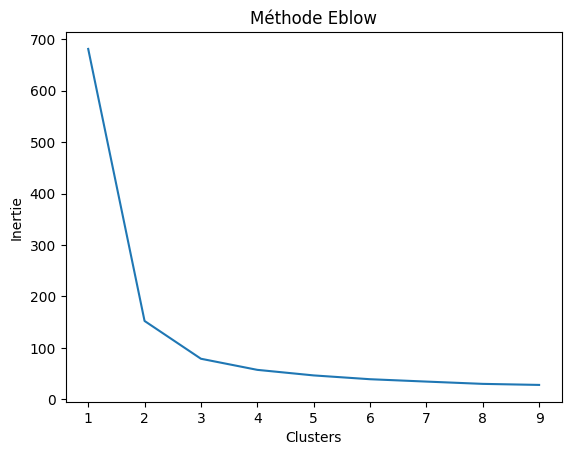

In [2]:
tab=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df)
    tab.append(kmeans.inertia_)
plt.plot(range(1,10),tab)
plt.title("Méthode Eblow")
plt.xlabel("Clusters")
plt.ylabel("Inertie")
plt.show()

Nous allons donc choisir 3 clusters pour notre cas. La variance est suffisament faible.

C:\Users\Etudiant\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


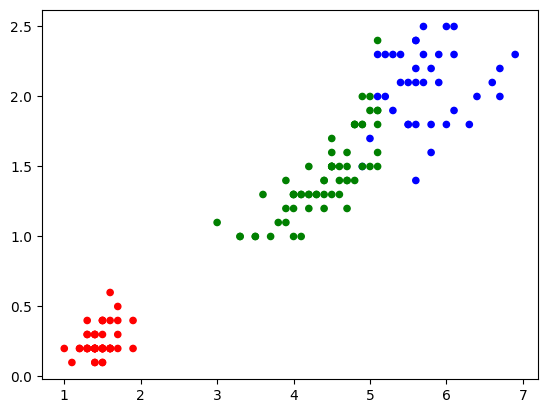

In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

colormap=np.array(["red", "green", "blue"])
plt.scatter(df.Longueur_petale, df.Largeur_petale, c=colormap[kmeans.labels_], s=20)
plt.show()